In [5]:
%matplotlib inline


# Individual Storm Analysis

This sample script illustrates how to retrieve a single storm from the HURDAT2 dataset, and make plots and analyses of this storm.



In [6]:
import tropycal.tracks as tracks
import datetime as dt

HURTDAT2 Dataset
----------------
Let's start by creating an instance of a TrackDataset object. By default, this reads in the HURDAT2 dataset from the National Hurricane  Center (NHC) website. For this example we'll be using the HURDAT2 dataset over the North Atlantic basin.

HURDAT data is not available for the most recent hurricane seasons. To include the latest data up through today, the "include_btk" flag  would need to be set to True, which reads in preliminary best track data from the NHC website.



In [7]:
hurdat_atl = tracks.TrackDataset(basin='north_atlantic',source='hurdat',include_btk=False)

--> Starting to read in HURDAT2 data
--> Completed reading in HURDAT2 data (2.78 seconds)


Individual storm analysis
-------------------------
Individual storms can be retrieved from the dataset by calling the ``get_storm()`` function, which returns an instance of a Storm object. This can be done by either entering a tuple containing the storm name and year, or by the standard tropical cyclone ID (e.g., "AL012019").

Let's retrieve an instance of Hurricane Michael from 2018:



In [8]:
storm = hurdat_atl.get_storm(('michael',2018))

This instance of Storm contains several methods that return the storm data back in different data types. The following examples will show # how to retrieve 3 different data types.

Retrieve a dictionary of Michael's data:



In [9]:
print(storm.to_dict())

{'id': 'AL142018', 'operational_id': 'AL142018', 'name': 'MICHAEL', 'year': 2018, 'season': 2018, 'basin': 'north_atlantic', 'source_info': 'NHC Hurricane Database', 'source': 'hurdat', 'date': [datetime.datetime(2018, 10, 6, 18, 0), datetime.datetime(2018, 10, 7, 0, 0), datetime.datetime(2018, 10, 7, 6, 0), datetime.datetime(2018, 10, 7, 12, 0), datetime.datetime(2018, 10, 7, 18, 0), datetime.datetime(2018, 10, 8, 0, 0), datetime.datetime(2018, 10, 8, 6, 0), datetime.datetime(2018, 10, 8, 12, 0), datetime.datetime(2018, 10, 8, 18, 0), datetime.datetime(2018, 10, 9, 0, 0), datetime.datetime(2018, 10, 9, 6, 0), datetime.datetime(2018, 10, 9, 12, 0), datetime.datetime(2018, 10, 9, 18, 0), datetime.datetime(2018, 10, 10, 0, 0), datetime.datetime(2018, 10, 10, 6, 0), datetime.datetime(2018, 10, 10, 12, 0), datetime.datetime(2018, 10, 10, 17, 30), datetime.datetime(2018, 10, 10, 18, 0), datetime.datetime(2018, 10, 11, 0, 0), datetime.datetime(2018, 10, 11, 6, 0), datetime.datetime(2018, 10,

Retrieve xarray Dataset object with Michael's data:



In [12]:
storm.to_xarray()

<xarray.Dataset>
Dimensions:    (time: 38)
Coordinates:
  * time       (time) datetime64[ns] 2018-10-06T18:00:00 ... 2018-10-15T18:00:00
Data variables:
    extra_obs  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
    special    (time) <U1 '' '' '' '' '' '' '' '' '' ... '' '' '' '' '' '' '' ''
    type       (time) <U2 'LO' 'LO' 'TD' 'TS' 'TS' ... 'EX' 'EX' 'EX' 'EX' 'EX'
    lat        (time) float64 17.8 18.1 18.4 18.8 19.1 ... 45.9 44.4 42.8 41.2
    lon        (time) float64 -86.6 -86.9 -86.8 -86.4 ... -11.4 -10.3 -10.0
    vmax       (time) int64 25 25 30 35 45 50 60 65 ... 65 65 60 55 55 50 35 35
    mslp       (time) int64 1006 1004 1004 1003 999 996 ... 978 982 989 996 1001
    wmo_basin  (time) <U14 'north_atlantic' ... 'north_atlantic'
Attributes:
    id:              AL142018
    operational_id:  AL142018
    name:            MICHAEL
    year:            2018
    season:          2018
    basin:           north_atlantic
    source_info:     NHC Hurricane Database
    source:          hurdat
    ace:             12.505000000000003

Retrieve pandas DataFrame object with Michael's data:



In [14]:
df = storm.to_dataframe()
df

,date,extra_obs,special,type,lat,lon,vmax,mslp,wmo_basin
0,2018-10-06 18:00:00,0,,LO,17.8,-86.6,25,1006,north_atlantic
1,2018-10-07 00:00:00,0,,LO,18.1,-86.9,25,1004,north_atlantic
2,2018-10-07 06:00:00,0,,TD,18.4,-86.8,30,1004,north_atlantic
3,2018-10-07 12:00:00,0,,TS,18.8,-86.4,35,1003,north_atlantic
4,2018-10-07 18:00:00,0,,TS,19.1,-85.7,45,999,north_atlantic
5,2018-10-08 00:00:00,0,,TS,19.7,-85.5,50,996,north_atlantic
6,2018-10-08 06:00:00,0,,TS,20.2,-85.4,60,984,north_atlantic
7,2018-10-08 12:00:00,0,,HU,20.9,-85.1,65,982,north_atlantic
8,2018-10-08 18:00:00,0,,HU,21.7,-85.1,75,977,north_atlantic
9,2018-10-09 00:00:00,0,,HU,22.7,-85.2,85,971,north_atlantic


# Let's grab some rainfall circles

In [15]:
import datetime
import xarray as xr

In [28]:
# URL to remotely access

# NASA THREDDS data server (TDS) URLs
#URL = 'https://goldsmr4.gesdisc.eosdis.nasa.gov/thredds/dodsC/MERRA2_MONTHLY_aggregation/M2TMNXAER.5.12.4_Aggregation.ncml' # aerosol
URL = 'https://gpm1.gesdisc.eosdis.nasa.gov/thredds/dodsC/aggregation/GPM_3IMERGM.06/GPM_3IMERGM.06_Aggregation.ncml.ncml' # GPM monthly

# NASA GDS data server (GDS) URLs
# https://gpm1.gesdisc.eosdis.nasa.gov/dods/

URLd= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGDF_06' # GPM daily accumulated final on GDS server
URLm= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGM_06'  # monthly accumulated
URLh= 'https://gpm1.gesdisc.eosdis.nasa.gov/dods/GPM_3IMERGHH_06' # half-hourly instantaneous

# Read the data: daily as a test
ds = xr.open_dataset(URLd)
ds

ValueError: found the following matches with the input file in xarray's IO backends: ['netcdf4', 'pydap']. But their dependencies may not be installed, see:
https://docs.xarray.dev/en/stable/user-guide/io.html 
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

In [26]:
df = df.reset_index()  # make sure indexes pair with number of rows
for index, row in df.iterrows():
    print(row['lat'], row['lon'], row['date'])

17.8 -86.6 2018-10-06 18:00:00
18.1 -86.9 2018-10-07 00:00:00
18.4 -86.8 2018-10-07 06:00:00
18.8 -86.4 2018-10-07 12:00:00
19.1 -85.7 2018-10-07 18:00:00
19.7 -85.5 2018-10-08 00:00:00
20.2 -85.4 2018-10-08 06:00:00
20.9 -85.1 2018-10-08 12:00:00
21.7 -85.1 2018-10-08 18:00:00
22.7 -85.2 2018-10-09 00:00:00
23.7 -85.8 2018-10-09 06:00:00
24.6 -86.2 2018-10-09 12:00:00
25.6 -86.4 2018-10-09 18:00:00
26.6 -86.5 2018-10-10 00:00:00
27.7 -86.6 2018-10-10 06:00:00
29.0 -86.3 2018-10-10 12:00:00
30.0 -85.5 2018-10-10 17:30:00
30.2 -85.4 2018-10-10 18:00:00
31.5 -84.5 2018-10-11 00:00:00
32.8 -83.2 2018-10-11 06:00:00
34.1 -81.7 2018-10-11 12:00:00
35.6 -80.0 2018-10-11 18:00:00
36.5 -77.7 2018-10-12 00:00:00
37.3 -75.0 2018-10-12 06:00:00
39.1 -70.6 2018-10-12 12:00:00
41.1 -66.1 2018-10-12 18:00:00
43.1 -61.5 2018-10-13 00:00:00
44.8 -55.7 2018-10-13 06:00:00
46.4 -48.2 2018-10-13 12:00:00
47.6 -40.7 2018-10-13 18:00:00
48.4 -33.1 2018-10-14 00:00:00
48.8 -26.1 2018-10-14 06:00:00
48.6 -20

In [9]:
df = df.reset_index()  # make sure indexes pair with number of rows
for index, row in df.iterrows():
    print(row['lat'], row['lon'], row['date'])
    specialat = row['lat']
    specialon = row['lon']
    specialtime = row['date']
    
    radius = 5 # degrees, ignoring cos(lat) factor in dx=dlon*cos(lat)

# Subset dataset to bounding box: 
    dsbox = ds.sel(lat=slice(specialat-radius,specialat+radius),
                   lon=slice(specialon-radius,specialon+radius),
                   time=specialtime); 

    lat2D = dsbox.lat * (dsbox.lon<999)
    lon2D = dsbox.lon * (dsbox.lat<999)
    dist2 = (lat2D-specialat)**2 + (lon2D-specialon)**2; dist2

    dsbox['precipcal'].plot(cmap='Blues')

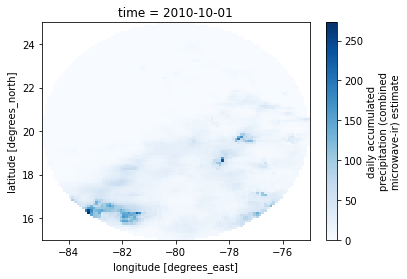

In [12]:
dsbox['precipcal'].where(dist2<radius**2).plot(cmap='Blues')

Visualize Michael's observed track with the "plot" function:

Note that you can pass various arguments to the plot function, such as customizing the map and track aspects. The only cartopy projection # currently offered is PlateCarree. Read through the documentation for more customization options.



/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


<GeoAxesSubplot:title={'left':'Hurricane MICHAEL','right':'07 Oct 2018 – 11 Oct 2018\n140 kt • 919 hPa • 12.5 ACE'}>

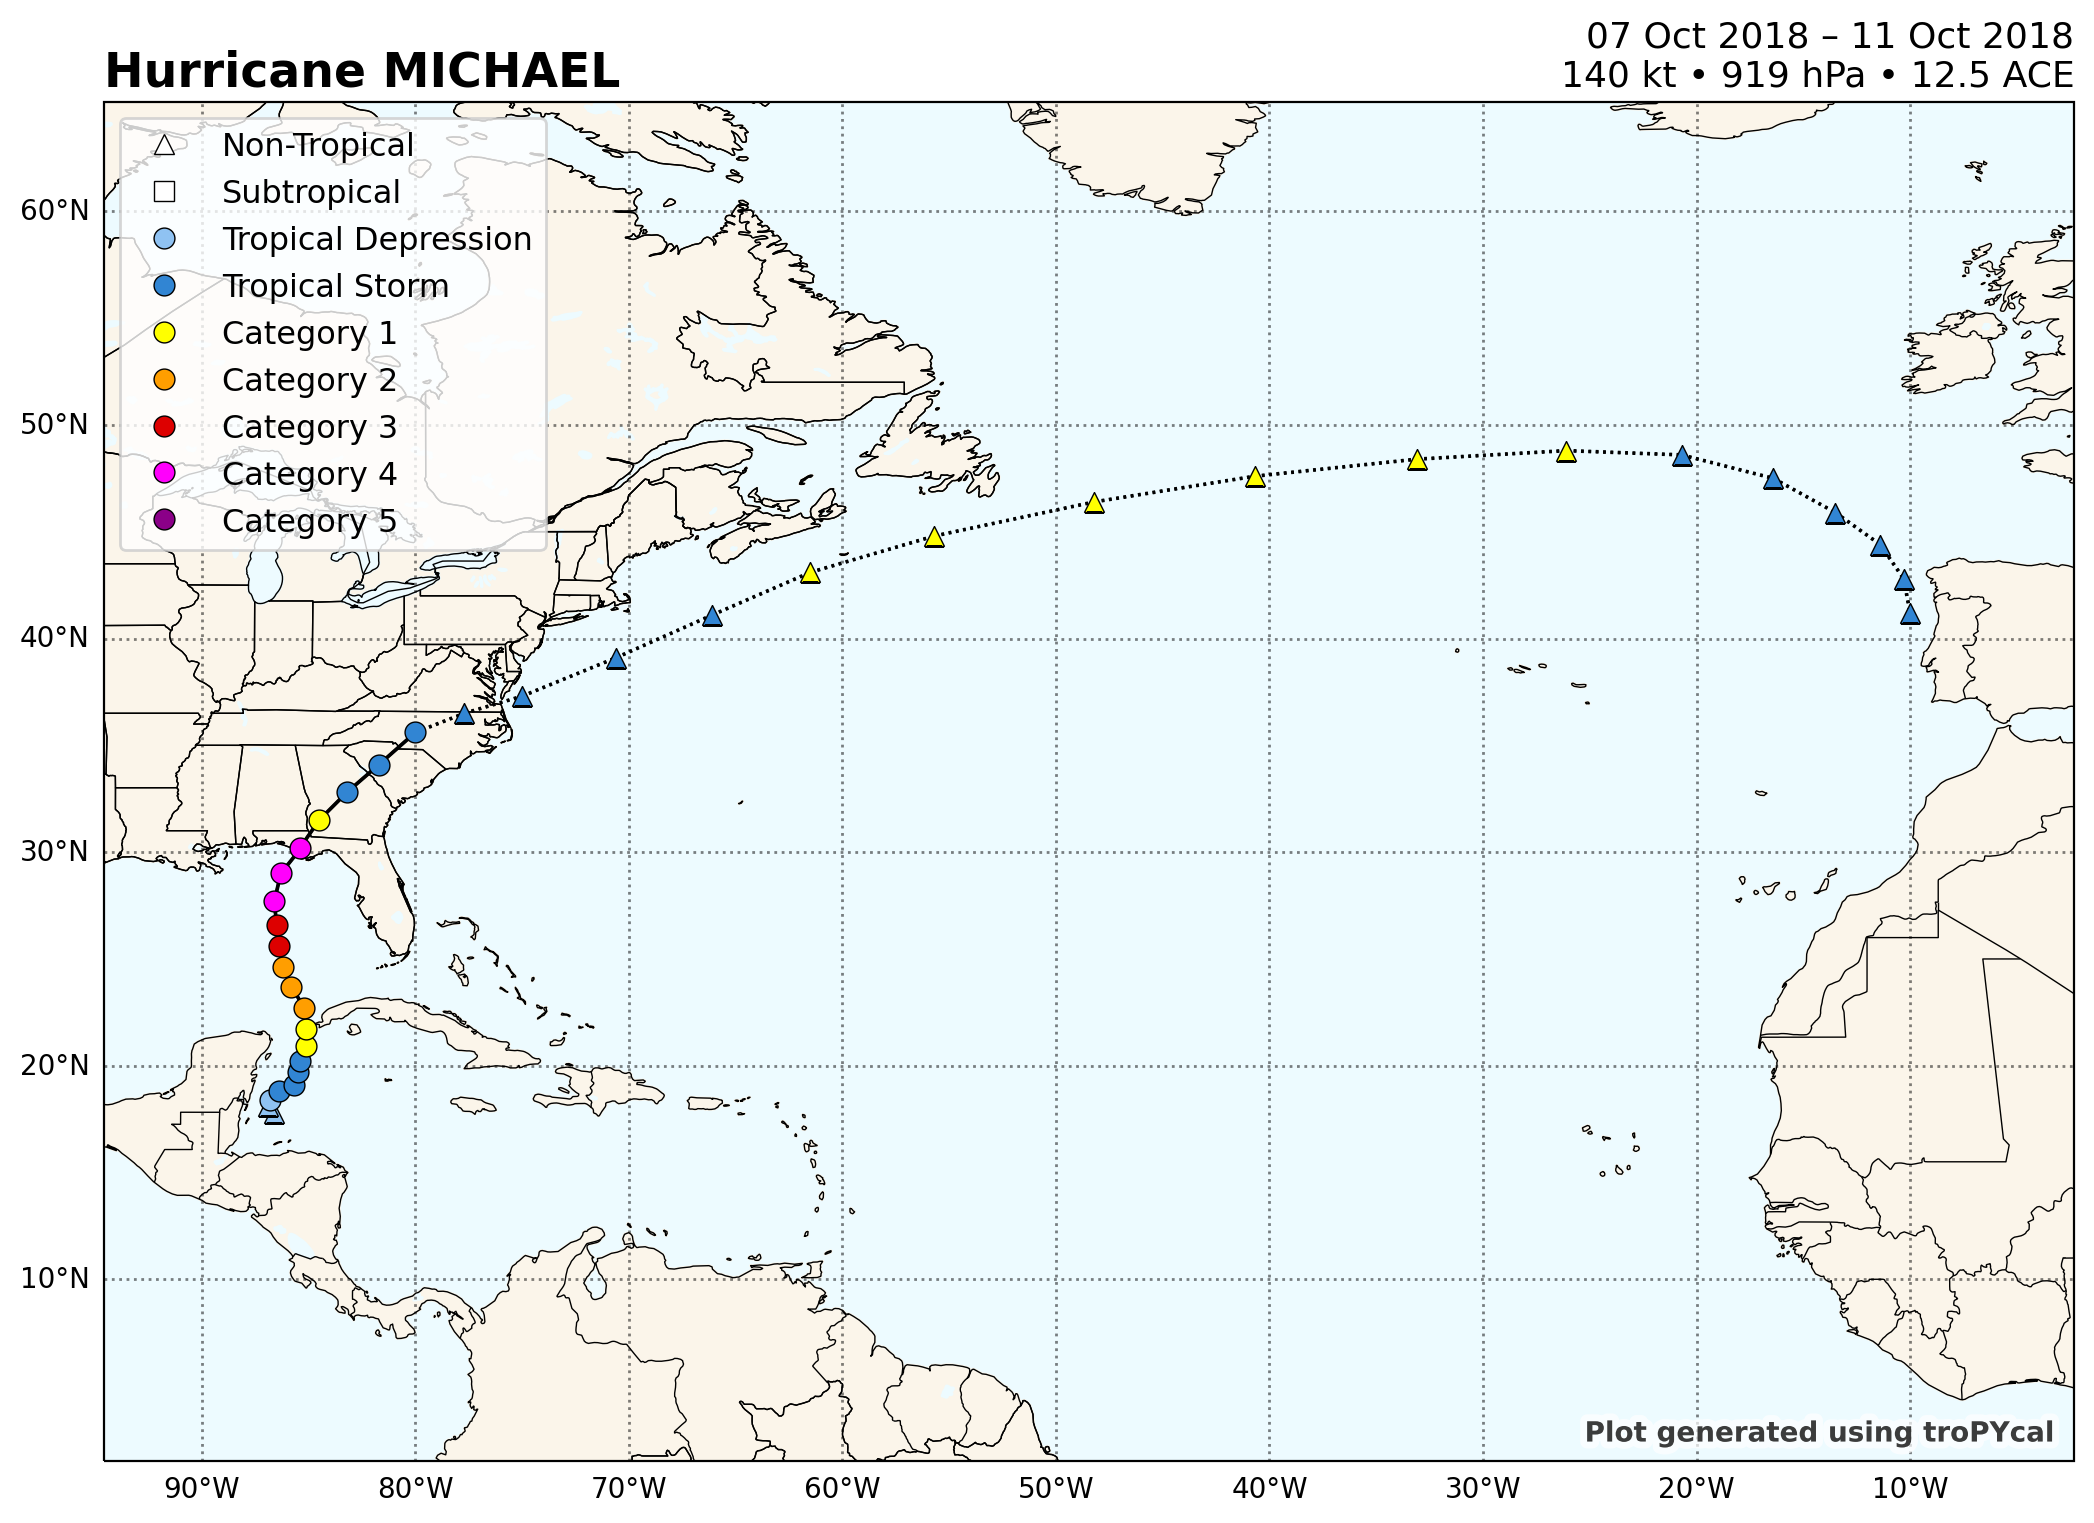

In [8]:
storm.plot()

Plot the tornado tracks associated with Michael, along with the accompanying daily practically perfect forecast (PPH):

Note: There is currently a bug with this function that outputs 2 axes, a filled one and a blank one. This will be fixed in future updates.



/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/tropycal/tracks/storm.py:1762: UserWarning: Reading in tornado data for this storm. If you seek to analyze tornado data for multiple storms, run "TrackDataset.assign_storm_tornadoes()" to avoid this warning in the future.
  warnings.warn(warn_message)


--> Starting to read in tornado track data


/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/tropycal/tornado/dataset.py:68: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Tors = pd.read_csv(f'https://www.spc.noaa.gov/wcm/data/1950-{yrlast}_actual_tornadoes.csv',\


--> Completed reading in tornado data for 1950-2020 (8.92 seconds)


/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bem/miniconda3/envs/tropycal/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


AttributeError: 'Bbox' object has no attribute 'inverse_transformed'

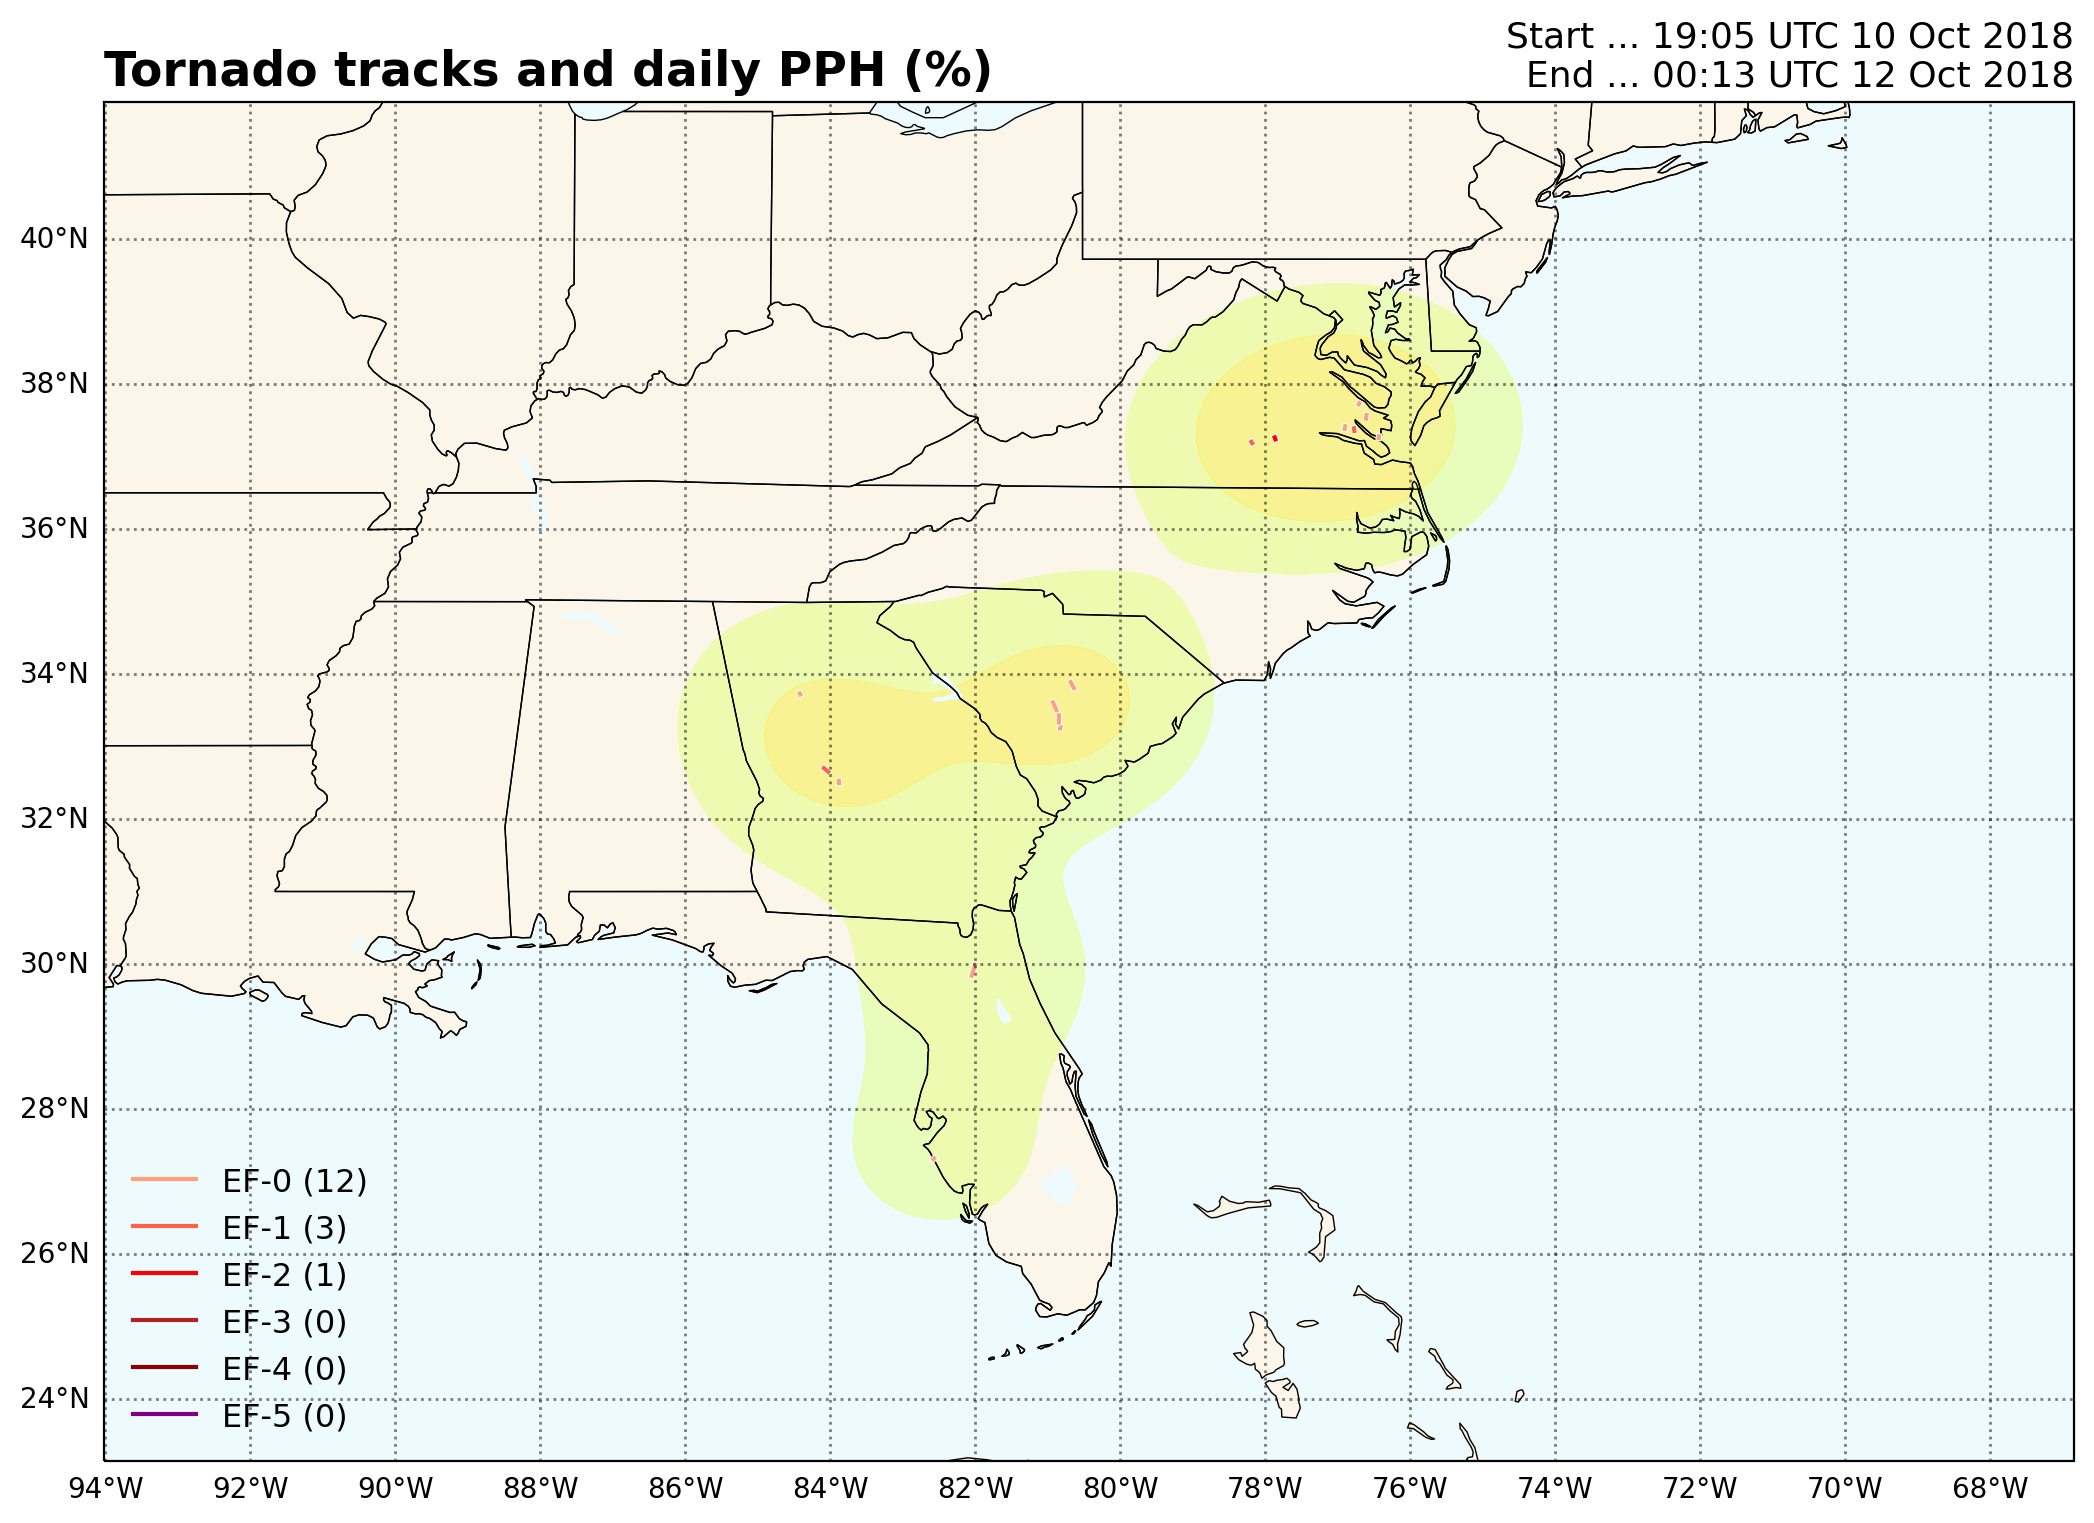

In [9]:
storm.plot_tors(plotPPH=True)

If this storm was ever in NHC's area of responsibility, you can retrieve operational NHC forecast data for this event provided it is available. Forecast discussions date back to 1992, and forecast tracks date back to 1954.

Retrieve a single forecast discussion for Michael:



In [ ]:
#Method 1: Specify date closest to desired discussion
disco = storm.get_nhc_discussion(forecast=dt.datetime(2018,10,7,0))
print(disco['text'])

#Method 2: Specify forecast discussion ID
disco = storm.get_nhc_discussion(forecast=2)
#print(disco['text']) printing this would show the same output

NHC also archives forecast tracks, albeit in a different format than the official advisory data, so the operational forecast IDs here differ from the discussion IDs. As such, the forecast cone is not directly retrieved from NHC, but is generated using an algorithm that yields a cone closely resembling the official NHC cone.

Let's plot Michael's second forecast cone:



In [ ]:
storm.plot_nhc_forecast(forecast=2)

Now let's look at the 12th forecast for Michael.

Note that the observed track here differs from the HURDAT2 track plotted previously! This is because this plot displays the operationally analyzed location and intensity, rather than the post-storm analysis data. This is done to account for differences between HURDAT2 and operational data.



In [ ]:
storm.plot_nhc_forecast(forecast=12)

IBTrACS Dataset
---------------

We can also read in IBTrACS data and use it the same way as we would use HURDAT2 data. There are caveats to using IBTrACS data, however, which are described more in depth in the :doc:`../data` page. We'll retrieve the global IBTrACS dataset, using the Joint Typhoon Warning Center (JTWC) data, modified with the Neumann reanalysis for southern hemisphere storms, and including a special reanalysis for Cyclone Catarina (2004) in Brazil.

<div class="alert alert-danger"><h4>Warning</h4><p>By default, IBTrACS data is read in from an online source. If you're reading in the global IBTrACS dataset, this could be quite slow.  For global IBTrACS, it is recommended to have the CSV file saved locally (`link to data`_), then set the flag ``ibtracs_url="local_path"``.</p></div>




In [ ]:
ibtracs = tracks.TrackDataset(basin='all',source='ibtracs',ibtracs_mode='jtwc_neumann',catarina=True)

The functionality for handling storms in IBTrACS is the same as with using HURDAT2, the only limitation being no NHC and operational model data can be accessed when using IBTrACS as the data source.

`Super Typhoon Haiyan`_ (2013) was a catastrophic storm in the West Pacific basin, having made landfall in the Philippines. With estimated sustained winds of 195 mph (170 kt), it is among one of the most powerful tropical cyclones in recorded history. We can illustrate this by making a plot of Haiyan's observed track and intensity, from JTWC data:




In [ ]:
storm = ibtracs.get_storm(('haiyan',2013))
storm.plot()

`Cyclone Catarina`_ (2004) was an extremely rare hurricane-force tropical cyclone that developed in the South Atlantic basin, which normally doesn't see tropical cyclone activity, and subsequently made landfall in Brazil. The "Catarina" name is unofficial; it was not assigned a name in real time, and JTWC assigned it the ID "AL502004". Recall that when reading in the IBTrACS dataset previously, we set ``Catarina=True``. This read in data for Cyclone Catarina from a special post-storm reanalysis from McTaggart-Cowan et al. (2006). Let's make a plot of Catarina's observed track and intensity per this reanalysis:




In [ ]:
storm = ibtracs.get_storm(('catarina',2004))
storm.plot()

If we were to read in IBTrACS without setting ``Catarina=True`` (which sets it to False by default) and plot the track for "AL502004", we would get a noticeably different (shorter) and weaker track.

